# model_4 - configuration & training

In [1]:
# Choosing of single GPU - has to be done before tensorflow import:
# All the notebooks used earlier with that option have to be closed or to have to have restarted the kernel
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"        # Will use only single GPU device

In [2]:
import numpy as np
import pandas as pd
import my_functions
import keras
from keras import layers
from keras import models
from keras import Model
from keras import optimizers
from keras import regularizers
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/fra

## 1. New model configuration

### 1.1 New convolutional base
- Available models:

In [3]:
%%bash
ls ./Models

classifier_0.h5
classifier_1.h5
classifier_2.h5
conv_base_0.h5
conv_base_1.h5
conv_base_2.h5
model_0_0-100-100-RMSp-trd.h5
model_0_0-100-100-sgd-trd.h5
model_0_0-100-120-rmsp-trd.h5
model_0_0-100-150-adlt-trd.h5
model_0_0-100-150-sgd-trd.h5
model_0_0-15-15-rmsp-trd.h5
model_0_0-15-25-RMSp-trd.h5
model_0_0-15-40-sgd-trd.h5
model_0_0-30-100-sgd-trd.h5
model_0_8-100-100-sgd-trd.h5
model_0_8-100-150-sgd-trd.h5
model_0_8-100-21-RMSp-trd.h5
model_0_8-100-30-adlt-trd.h5
model_0_8-100-30-RMSp-trd.h5
model_0_8-30-100-sgd-trd.h5
model_0_8-30-30-adlt-trd.h5
model_0_8-30-32-sgd-trd.h5
model_0_8-30-8-adlt-trd.h5
model_0_8-30-8-RMSp-trd.h5
model_0.h5
model_1_8-100-100-sgd-trd.h5
model_1_8-100-30-RMSp-trd.h5
model_1_8-30-32-sgd-trd.h5
model_1_8-30-40-sgd-trd.h5
model_1_8-30-9-adlt-trd.h5
model_1.h5
model_2_8-100-100-sgd-trd.h5
model_2_8-100-25-RMSp-trd.h5
model_2_8-30-20-adlt-trd.h5
model_2_8-30-40-sgd-trd.h5
model_2_8-30-9-adlt-trd.h5
model_2.h5
model_3_8-100-100-adlt-trd.h5
model_3_8-100-100-sgd-tr

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.name = 'conv_base_3'
model.summary()
model.save('./Models/conv_base_3.h5')

Model: "conv_base_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         

### 1.2 Classifier modification

In [5]:
classifier_3 = models.Sequential()
classifier_3.add(layers.Dense(512, activation='relu', input_dim=1*1*128))
classifier_3.add(layers.Dense(2, activation='sigmoid'))
classifier_3.name = 'classifier_3'
classifier_3.summary()
classifier_3.save('./Models/classifier_3.h5')

Model: "classifier_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 67,074
Trainable params: 67,074
Non-trainable params: 0
_________________________________________________________________


### 1.3 model_4 aggregation

In [6]:
conv_base_3 = keras.models.load_model('./Models/conv_base_3.h5')
classifier_3 = keras.models.load_model('./Models/classifier_3.h5')

model_4 = models.Sequential()
model_4.add(conv_base_3)
model_4.add(layers.Flatten())
model_4.add(classifier_3)
model_4.name = 'model_4'
model_4.summary()
model_4.save('./Models/model_4.h5') # not trained

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_base_3 (Sequential)     (None, 1, 1, 128)         388416    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
classifier_3 (Sequential)    (None, 2)                 67074     
Total params: 455,490
Trainable params: 455,490
Non-trainable params: 0
_________________________________________________________________


## 2. Data loading and transformation
- Available data:

In [7]:
%%bash
ls ./Used_data

TEST_IMAGES.npy
TEST_LABELS.npy
TRAIN_IMAGES.npy
TRAIN_LABELS.npy
TRAIN_X_EXTD.npy
TRAIN_Y_EXTD.npy
VALID_IMAGES.npy
VALID_LABELS.npy


In [8]:
# Loads and transforms 'Used data' to CNN training

train_x_name = 'TRAIN_X_EXTD.npy'
train_y_name = 'TRAIN_Y_EXTD.npy'

TRAIN_X, VALID_X, TEST_X, TRAIN_Y, VALID_Y, TEST_Y = my_functions.data_conversion(train_x_name, train_y_name)


LOADED DATA (before conversion):
  set name              shape  dtype       data sight
0  TRAIN_X  (8000, 96, 96, 3)  uint8     [87, 73, 37]
1  TRAIN_Y            (8000,)  uint8                2
2  VALID_X   (500, 96, 96, 3)  uint8  [204, 205, 210]
3  VALID_Y             (500,)  uint8                1
4   TEST_X   (500, 96, 96, 3)  uint8  [132, 167, 203]
5   TEST_Y             (500,)  uint8                1

DATA FOR TRAINING (after conversion):
  set name              shape    dtype                            data sight
0  TRAIN_X  (8000, 96, 96, 3)  float32  [0.34117648, 0.28627452, 0.14509805]
1  TRAIN_Y          (8000, 2)  float32                            [0.0, 1.0]
2  VALID_X   (500, 96, 96, 3)  float32           [0.8, 0.8039216, 0.8235294]
3  VALID_Y           (500, 2)  float32                            [1.0, 0.0]
4   TEST_X   (500, 96, 96, 3)  float32     [0.5176471, 0.654902, 0.79607844]
5   TEST_Y           (500, 2)  float32                            [1.0, 0.0]


## 3. Model training

For the training the models without 'trd' have to be choosen,
models with 'trd' are trained already

- Available models to choice:

In [9]:
%%bash
ls ./Models

classifier_0.h5
classifier_1.h5
classifier_2.h5
classifier_3.h5
conv_base_0.h5
conv_base_1.h5
conv_base_2.h5
conv_base_3.h5
model_0_0-100-100-RMSp-trd.h5
model_0_0-100-100-sgd-trd.h5
model_0_0-100-120-rmsp-trd.h5
model_0_0-100-150-adlt-trd.h5
model_0_0-100-150-sgd-trd.h5
model_0_0-15-15-rmsp-trd.h5
model_0_0-15-25-RMSp-trd.h5
model_0_0-15-40-sgd-trd.h5
model_0_0-30-100-sgd-trd.h5
model_0_8-100-100-sgd-trd.h5
model_0_8-100-150-sgd-trd.h5
model_0_8-100-21-RMSp-trd.h5
model_0_8-100-30-adlt-trd.h5
model_0_8-100-30-RMSp-trd.h5
model_0_8-30-100-sgd-trd.h5
model_0_8-30-30-adlt-trd.h5
model_0_8-30-32-sgd-trd.h5
model_0_8-30-8-adlt-trd.h5
model_0_8-30-8-RMSp-trd.h5
model_0.h5
model_1_8-100-100-sgd-trd.h5
model_1_8-100-30-RMSp-trd.h5
model_1_8-30-32-sgd-trd.h5
model_1_8-30-40-sgd-trd.h5
model_1_8-30-9-adlt-trd.h5
model_1.h5
model_2_8-100-100-sgd-trd.h5
model_2_8-100-25-RMSp-trd.h5
model_2_8-30-20-adlt-trd.h5
model_2_8-30-40-sgd-trd.h5
model_2_8-30-9-adlt-trd.h5
model_2.h5
model_3_8-100-100-adlt-

#### Existing results overview:

In [10]:
# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.1 model_4 & optimizer sgd:

Train on 8000 samples, validate on 500 samples
Epoch 1/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6924 - acc: 0.5394 - val_loss: 0.6918 - val_acc: 0.6360
Epoch 2/100
8000/8000 [==============================] - 7s 825us/step - loss: 0.6911 - acc: 0.6860 - val_loss: 0.6901 - val_acc: 0.7540
Epoch 3/100
8000/8000 [==============================] - 7s 816us/step - loss: 0.6894 - acc: 0.6971 - val_loss: 0.6880 - val_acc: 0.7440
Epoch 4/100
8000/8000 [==============================] - 7s 815us/step - loss: 0.6873 - acc: 0.7232 - val_loss: 0.6850 - val_acc: 0.7640
Epoch 5/100
8000/8000 [==============================] - 7s 816us/step - loss: 0.6841 - acc: 0.7234 - val_loss: 0.6802 - val_acc: 0.7600
Epoch 6/100
8000/8000 [==============================] - 7s 816us/step - loss: 0.6791 - acc: 0.7266 - val_loss: 0.6729 - val_acc: 0.7560
Epoch 7/100
8000/8000 [==============================] - 7s 817us/step - loss: 0.6711 - acc: 0.7240 - val_loss: 0.6611 - val_acc: 0.7

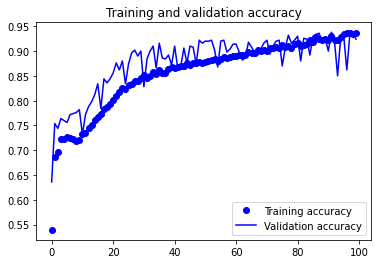

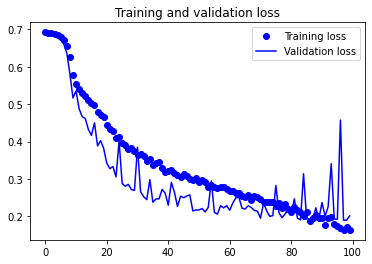

In [11]:
model = keras.models.load_model('./Models/model_4.h5') # not trained model!

epochs = 100
batch_size = 100
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_4_8-100-100-sgd-trd' # model after training, name without file extension !
notebook = 'Module_7'
model_descr = '32+64+128+128+128'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [12]:
remark = 'ok'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.2 model_4 & optimizer adadelta:

Train on 8000 samples, validate on 500 samples
Epoch 1/20
8000/8000 [==============================] - 8s 953us/step - loss: 0.6627 - acc: 0.6336 - val_loss: 0.5692 - val_acc: 0.7560
Epoch 2/20
8000/8000 [==============================] - 7s 857us/step - loss: 0.5611 - acc: 0.7351 - val_loss: 0.3983 - val_acc: 0.8560
Epoch 3/20
8000/8000 [==============================] - 7s 862us/step - loss: 0.4614 - acc: 0.8031 - val_loss: 0.3110 - val_acc: 0.8700
Epoch 4/20
8000/8000 [==============================] - 7s 861us/step - loss: 0.3839 - acc: 0.8385 - val_loss: 0.4526 - val_acc: 0.8060
Epoch 5/20
8000/8000 [==============================] - 7s 861us/step - loss: 0.3616 - acc: 0.8474 - val_loss: 0.3095 - val_acc: 0.9000
Epoch 6/20
8000/8000 [==============================] - 7s 864us/step - loss: 0.3183 - acc: 0.8681 - val_loss: 0.3056 - val_acc: 0.8600
Epoch 7/20
8000/8000 [==============================] - 7s 865us/step - loss: 0.3115 - acc: 0.8681 - val_loss: 0.2236 - val_acc: 0.9040
E

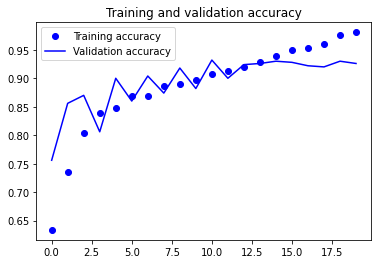

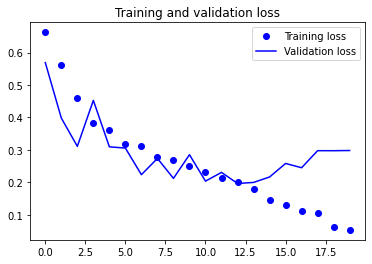

In [13]:
model = keras.models.load_model('./Models/model_4.h5') # not trained model!

epochs = 20
batch_size = 100
optimizer = 'adadelta'
optimizer_name = optimizer
trd_model_name = 'model_4_8-100-20-adlt-trd' # model after training, name without file extension !
notebook = 'Module_7'
model_descr = '32+64+128+128+128'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [14]:
remark = '13-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.3 model_4 & optimizer RMSprop(lr=1e-4)

Train on 8000 samples, validate on 500 samples
Epoch 1/30
8000/8000 [==============================] - 7s 931us/step - loss: 0.5957 - acc: 0.6913 - val_loss: 0.4686 - val_acc: 0.8300
Epoch 2/30
8000/8000 [==============================] - 7s 841us/step - loss: 0.4994 - acc: 0.7676 - val_loss: 0.3955 - val_acc: 0.8420
Epoch 3/30
8000/8000 [==============================] - 7s 841us/step - loss: 0.4605 - acc: 0.7949 - val_loss: 0.3196 - val_acc: 0.8620
Epoch 4/30
8000/8000 [==============================] - 7s 846us/step - loss: 0.4183 - acc: 0.8183 - val_loss: 0.3365 - val_acc: 0.8660
Epoch 5/30
8000/8000 [==============================] - 7s 842us/step - loss: 0.4013 - acc: 0.8265 - val_loss: 0.2742 - val_acc: 0.8840
Epoch 6/30
8000/8000 [==============================] - 7s 857us/step - loss: 0.3755 - acc: 0.8380 - val_loss: 0.2541 - val_acc: 0.8860
Epoch 7/30
8000/8000 [==============================] - 7s 849us/step - loss: 0.3593 - acc: 0.8457 - val_loss: 0.2443 - val_acc: 0.9020
E

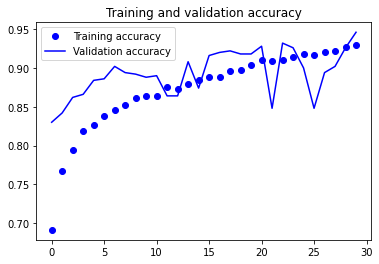

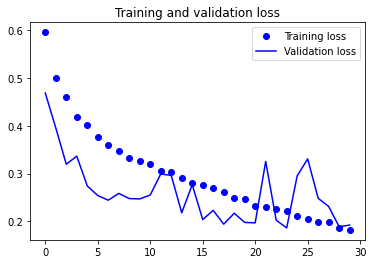

In [15]:
model = keras.models.load_model('./Models/model_4.h5') # not trained model!

epochs = 30
batch_size = 100
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_4_8-100-30-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_7'
model_descr = '32+64+128+128+128'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [16]:
remark = 'ok'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.4 model_4 & optimizer RMSprop(lr=1e-4)

Train on 8000 samples, validate on 500 samples
Epoch 1/40
8000/8000 [==============================] - 8s 947us/step - loss: 0.5970 - acc: 0.6948 - val_loss: 0.4744 - val_acc: 0.7940
Epoch 2/40
8000/8000 [==============================] - 7s 835us/step - loss: 0.5020 - acc: 0.7648 - val_loss: 0.4170 - val_acc: 0.8280
Epoch 3/40
8000/8000 [==============================] - 7s 835us/step - loss: 0.4487 - acc: 0.7965 - val_loss: 0.4252 - val_acc: 0.8100
Epoch 4/40
8000/8000 [==============================] - 7s 829us/step - loss: 0.4193 - acc: 0.8135 - val_loss: 0.3443 - val_acc: 0.8500
Epoch 5/40
8000/8000 [==============================] - 7s 832us/step - loss: 0.3950 - acc: 0.8269 - val_loss: 0.3560 - val_acc: 0.8440
Epoch 6/40
8000/8000 [==============================] - 7s 834us/step - loss: 0.3718 - acc: 0.8395 - val_loss: 0.2470 - val_acc: 0.9020
Epoch 7/40
8000/8000 [==============================] - 7s 834us/step - loss: 0.3570 - acc: 0.8470 - val_loss: 0.4394 - val_acc: 0.8180
E

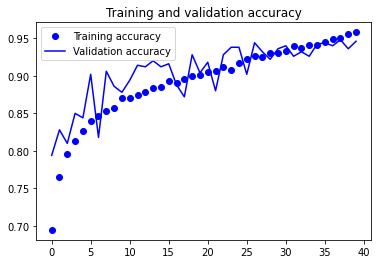

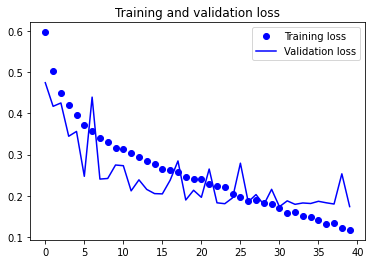

In [17]:
model = keras.models.load_model('./Models/model_4.h5') # not trained model!

epochs = 40
batch_size = 100
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_4_8-100-40-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_7'
model_descr = '32+64+128+128+128'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [18]:
remark = 'ok'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit
